<a href="https://colab.research.google.com/github/sharon-kurant/backprop_from_scratch/blob/main/DL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Course: Assignment #1 

Submitted by:

 **Student 1

 **Student 2

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be written in Python 3.7+

· You are allowed to use only Pytorch, numpy and matplotlib as external libraries

· The code must be reasonably documented

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


In [1]:
%matplotlib inline

## Question 1:  Multidimentional XOR and backpropagation


Given $ d $ bits $b=(b_1, b_2, ... , b_d) \in \{0, 1\}^d$, we define $$XOR(b) = Σ_{i=1}^db_i\ mod\ 2$$

You will train a feedforward neural network to model the multidimentional XOR problem.

The following function returns the labeled XOR "dataset" for any given $d$ (`dim`)

In [2]:
import itertools

def XORData(dim):
  X = np.array(list(itertools.product([0, 1], repeat=dim)))
  Y = X.sum(axis=1)%2
  return X, Y

Implement the following:

1. A linear layer class:`Linear(torch.nn.Module)`\
• You shold inherit from `torch.nn.Module`\
• You can not use `torch.nn.LinearLayer` or any other model implemented by PyTorch, only tensors. Wrap every tensor object with `torch.nn.Parameter` (for the optimizer).\
• Use `torch.randn` to initialize the parameter tensors (weights matrix and biases vector)\
• Implement the `forward` method according to the linear model $y = Wx + b$\
• The number of parameters should be defined by `in_features` and `out_features` \
• Make sure to enable gradient computation!

In [3]:
import torch
import torch.nn as nn

class Linear(nn.Module):
  def __init__(self, in_features, out_features):
    # Implement here
    super(Linear, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.randn(out_features))
  def forward(self, x):
    # Implement here
    x = torch.matmul(x, self.weights) + self.bias
    return x

2. A feedforward neural network:`FFNet(torch.nn.module)`\
• Use the `Linear` class you implemented to construct a network with `in_features` input size, `out_features` output size, and one hidden layer with `hidden_size` neurons.\
• Use the sigmoid activation function on top of the hidden layer neurons.\
• The XOR example we saw in class should help you.

In [ ]:
class FFNet(nn.Module):
  def __init__(self, in_features, out_features, hidden_size):
    # Implement here
    super(FFNet, self).__init__()
    self.input_layer = Linear(in_features, hidden_size)
    self.hidden_layer = Linear(hidden_size, out_features)
  def forward(self, x):
    # Implement here
    x = self.input_layer.forward(x)
    x = torch.sigmoid(x)
    x = self.hidden_layer.forward(x)
    return x

### Exploring the hidden layer
In class we talked about the **Universal Approximation Theorem**. The following question will help us to understand how hard is finding the optimal weight that the theorem talks about.

You are given a basic training function.

In [4]:
import numpy as np
import torch.optim as optim

loss_func = nn.MSELoss()

def train(net, X, Y, epochs=3000):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint((X.shape[0]))
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          optimizer.step()
      if(i % 100 == 0):
          print("Epoch:{}, Loss:{}".format(i, loss.detach()))

Using the above, for each of the dimentions: $d = 2, 3, 4, 5$:
1. Create the corresponding dataset using `XORData`
2. Create models with different hidden layer sizes($1, 2, 3, ..., d,d+const, const*d,...$ etc.) and an optimizer for it using: `optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
`
3. Try to train the different networks on the dataset.

Make sure to create a new `FFNet` and optimizer objects each time you call `train`.


In [ ]:
# Implement here
constant = 2

for d in range(2,6):

  print(f"\nFFNet dimension: input: {d}, hidden layer: {d}, output: 1")
  X, Y = XORData(d)
  model = FFNet(d, 1, d)
  optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
  train(model, X, Y)

  print(f"\nFFNet dimension: input: {d}, hidden layer: {d*constant}, output: 1")
  model = FFNet(d, 1, d*constant)
  optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
  train(model, X, Y)

  print("")


FFNet dimension: input: 2, hidden layer: 2, output: 1
Epoch:0, Loss:0.41431179642677307
Epoch:100, Loss:0.16003713011741638
Epoch:200, Loss:0.004768176004290581
Epoch:300, Loss:3.238806698391272e-07
Epoch:400, Loss:4.377298523650097e-11
Epoch:500, Loss:5.684341886080802e-14
Epoch:600, Loss:0.0
Epoch:700, Loss:1.2789769243681803e-13
Epoch:800, Loss:1.2789769243681803e-13
Epoch:900, Loss:5.684341886080802e-14
Epoch:1000, Loss:2.877698079828406e-13
Epoch:1100, Loss:2.2737367544323206e-13
Epoch:1200, Loss:2.2737367544323206e-13
Epoch:1300, Loss:5.684341886080802e-14
Epoch:1400, Loss:1.4210854715202004e-14
Epoch:1500, Loss:1.2789769243681803e-13
Epoch:1600, Loss:2.2737367544323206e-13
Epoch:1700, Loss:1.2789769243681803e-13
Epoch:1800, Loss:2.2737367544323206e-13
Epoch:1900, Loss:1.4210854715202004e-14
Epoch:2000, Loss:5.684341886080802e-14
Epoch:2100, Loss:3.197442310920451e-14
Epoch:2200, Loss:1.2789769243681803e-13
Epoch:2300, Loss:1.7408297026122455e-13
Epoch:2400, Loss:1.2789769243681

For which dimensions you were able to reach a model that converges (loss value is geting close to 0)?\
**Answer:** \
FFNet dimensions: input: 2, neurons in the hidden layer: 4, output: 1
\
AND
\
FFNet dimension: input: 3, neurons in the hidden layerlayer: 3, output: 1
\
<br>

What is the number of hidden neurons in that network and how did you find it?\
**Answer:** \
We assumed that having the hidden layer larger can help classify more complex data, we took the amount of inputs and multiplies it by a constant of 2. And after running the training we obsereved that it does help. \
<br>

What results did you expect and how does it differ from the results you achieved? \
**Answer:** \
We expected that adding more neurons to the hidden layer of the neural network would affect its ability to represent complex relationships in the data. The data was XOR, so we expected that the more neurons in the hidden layer, the ability of the neural network to separate the data would improve and we will get more precise results.\
The best result we’ve got is for input size 2 and 4 neurons in the hidden layer. The data is not complex for its input size (2 dimensions). 
By increasing the input size we expected to require more neurons in the hidden layer in order to get good performance of the net.

### Backpropagation

The following part will focus on the computaion of gradients w.r.t the model parameters, to understand what is happening behind `loss.backward()`.

Implement the function:`calc_gradients(net, x, loss)`:

Input: instance of `FFNet` with a hidden layer of size 2, input of size 2 and output of size 1, input vector `x` and `loss` value.

Output: One dimensional tensor with the gradients of the loss w.r.t each of the parameters, ordered as the corresponding parameters order `net.parameters()` returns (if we would flatten it's output). 

1. Comute(by hand) the derivatives w.r.t the second linear layer parameters
2. Use the chain rule to comute(by hand) the derivatives w.r.t the first linear layer parameters
3. Implement the final form computations per parameter.
4. Order the gradients as described above

Practical number 4 slides 26-28 should be helpful.

In [ ]:
def calc_gradients(net, x, y_hat, y_var, loss):
  
  w1_1, w1_2, w1_3, w1_4 = net.input_layer.weights.flatten()
  b1_1, b1_2 = net.input_layer.bias.flatten()

  w2_1, w2_2 = net.hidden_layer.weights.flatten()
  
  z1 = torch.sigmoid(w1_1 * x[0] + w1_3 * x[1] +b1_1)
  z2 = torch.sigmoid(w1_2 * x[0] + w1_4 * x[1] +b1_2)

  L_d = 2 * (y_hat - y_var)
  z1_d = z1 * (1-z1)
  z2_d = z2 * (1-z2)

  dL_w2_1 = L_d * z1
  dL_w2_2 = L_d * z2

  dL_w1_1 = L_d * w2_1 * z1_d * x[0]
  dL_w1_2 = L_d * w2_2 * z2_d * x[0]

  dL_w1_3 = L_d * w2_1 * z1_d * x[1]
  dL_w1_4 = L_d * w2_2 * z2_d * x[1]

  dL_b1_1 = L_d * w2_1 * z1_d
  dL_b1_2 = L_d * w2_2 * z2_d

  dL_b2 = L_d

  return torch.tensor([dL_w1_1, dL_w1_2, dL_w1_3, dL_w1_4, dL_b1_1, dL_b1_2, dL_w2_1, dL_w2_2, dL_b2])

Run the following cell to check the correctness of your computation:

In [ ]:
def equal_gradients(net, x, y_hat, y_var, loss):
  grads = []
  for param in net.parameters():
    grads.append(param.grad.view(-1))
  grads = torch.cat(grads)
  return True if torch.sum(grads.round(decimals = 4) - calc_gradients(net, x, y_hat, y_var, loss).round(decimals = 4)) == 0 else False

def train_and_compare(net, X, Y, epochs=100):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint(X.shape[0])
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          if not equal_gradients(net, x_var, y_hat, y_var, loss.item()):
            print("Wrong gradients computation!")
            return
          optimizer.step()
  print("Correct gradients computation!")

model = FFNet(2, 1, 2)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
X, Y = XORData(2)


train_and_compare(model, X, Y)

Correct gradients computation!


### Question 2: Solving Fashion-MNIST

In class we've learned about MNIST data set, which can be loaded from torchvision.datasets.
We built a feedforward network for MNIST classification with accuracy of ~96%.
In this assignment we will use Fashion-MNIST, which is also a built-in dataset in Pytorch. We'll
try different networks and find which one fits better.

The code must run on GPU.

In [5]:
import torch
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# Use .to(device) when needed to train on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Add any additional functions here

Please implement the following modules and functions:
1. Function 1: `load_dataset()`\
Load the Fashion-MNIST training and test set from Pytorch. Split the training set to
training and validation set (80%-20% ratio). Define a DataLoader for each set. In the
DataLoader parameters use "batch_size"=64.


In [6]:
### Implement here
def load_dataset(p = 0.2):
  normalize = transforms.Normalize((0.2859,), (0.3530,))
  totensor = transforms.ToTensor()
  mnist_transforms = transforms.Compose([totensor, normalize])

  mnist_trainset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=mnist_transforms)
  mnist_testset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=mnist_transforms)

  indices = list(range(len(mnist_trainset))) # 60K
  np.random.shuffle(indices)

  split = int(np.floor(p * len(mnist_trainset))) # 12K
  train_sample = SubsetRandomSampler(indices[split:])
  val_sample = SubsetRandomSampler(indices[:split])
  
  train_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = train_sample, batch_size=64)
  val_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = val_sample, batch_size=64)
  test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

  k_choices = int(np.floor(len(indices[split:])*0.1)) # 4.8K
  train_sample_small = SubsetRandomSampler(np.random.choice(indices[split:],size=k_choices))
  train_loader_small = torch.utils.data.DataLoader(mnist_trainset, sampler = train_sample_small, batch_size=64)

  print('train set len', len(train_loader.sampler.indices))
  print('validation set len', len(val_loader.sampler.indices))
  print('test set len', len(test_loader.dataset))
  print('train_small set len', len(train_loader_small.sampler.indices))


  # SAVE TO /data/loaders
  loaders = {'train_loader': train_loader,
              'val_loader': val_loader,
              'test_loader': test_loader,
              'train_loader_small': train_loader_small}
  torch.save(loaders, '/data/loaders')

In [7]:
n_features = 28*28
n_classes = 10

class GenericFeedForwardNet(nn.Module):

  activation_func_map = {'relu': nn.ReLU, 'tanh': nn.Tanh, 'sigmoid': nn.Sigmoid}

  def __init__(self, n_features, n_hidden_units_per_layer, n_outputs, activation_func):
    super().__init__()

    if isinstance(n_hidden_units_per_layer, list):
      dim_list = [n_features, *n_hidden_units_per_layer, n_outputs]
    else:
      dim_list = [n_features, n_hidden_units_per_layer, n_outputs]
      
    layers = []
    for in_dim, out_dim in zip(dim_list[:-1], dim_list[1:]):
      layers += [
          nn.Linear(in_dim, out_dim)
      ]
      if activation_func in GenericFeedForwardNet.activation_func_map.keys():
        layers += [
            GenericFeedForwardNet.activation_func_map[activation_func]()
        ]
    
    if activation_func in GenericFeedForwardNet.activation_func_map.keys():
      self.fc = nn.Sequential(*layers[:-1])
    else:
      self.fc = nn.Sequential(*layers)
    self.log_softmax = nn.LogSoftmax(dim = 1)
    
  def forward(self, x):
    h = self.fc(x)
    y_pred = self.log_softmax(h)
    return y_pred

In [8]:
def plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies):
  plt.plot(train_losses)
  plt.plot(val_losses)
  plt.grid()
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'])
  plt.show()

  print('')
  
  plt.plot(train_accuracies)
  plt.plot(val_accuracies)
  plt.plot(test_accuracies)
  plt.grid()
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation','test'])
  plt.show()

In [9]:
def train_model(model, optimizer, loss_func, train_loader):
  train_loss = 0.0
  train_accuracy = 0.0

  for data, labels in train_loader:
    # Transfer Data to GPU if available
    data = data.view(-1,28*28)

    if torch.cuda.is_available():
        data, labels = data.cuda(), labels.cuda()
    
    # Clear the gradients
    optimizer.zero_grad()
    # Forward Pass
    predictions = model(data)
    # Find the Loss
    loss = loss_func(predictions,labels)
    # Calculate gradients
    loss.backward()
    # Update Weights
    optimizer.step()
    # Calculate Loss
    train_loss += loss.item()
    train_accuracy += torch.sum(labels == predictions.argmax(axis=1)).item()

  train_accuracy = train_accuracy/len(train_loader.sampler.indices)
  train_loss = train_loss / len(train_loader)

  return train_loss, train_accuracy

In [10]:
def val_model(model, loss_func, val_loader):
  val_loss = 0.0
  val_accuracy = 0.0
  model.eval()     # Optional when not using Model Specific layer
  for data, labels in val_loader:

    data = data.view(-1,28*28)
    # Transfer Data to GPU if available
    
    if torch.cuda.is_available():
        data, labels = data.cuda(), labels.cuda()
    
    # Forward Pass
    predictions = model(data)
    # Find the Loss
    loss = loss_func(predictions,labels)
    # Calculate Loss
    val_loss += loss.item()
    val_accuracy += torch.sum(labels == predictions.argmax(axis=1)).item()

  val_accuracy = val_accuracy/len(val_loader.sampler.indices)
  val_loss = val_loss / len(val_loader)

  return val_loss, val_accuracy

In [11]:
import time

In [12]:
def test(model):
  n_correct = 0
  n_total = 0

  test_loader = torch.load('/data/loaders')['test_loader']

  for j, (data, labels) in enumerate(test_loader):

    if torch.cuda.is_available():
          data, labels = data.cuda(), labels.cuda()
    
    data = data.view(-1, n_features)

    y_hat = model(data)

    predictions = torch.argmax(y_hat, dim=1)

    n_correct += torch.sum(predictions==labels).type(torch.float32)
    n_total+= data.shape[0]
  
  acc = (n_correct/n_total).item()
  return acc

In [22]:
def train_val(model, epochs, optimizer, loss_func, lr_scheduler = None, small_train=False, early_stopping = False, patience = None):
  if torch.cuda.is_available():
    model = model.cuda()

  ## Check small train flag
  if small_train:
    train_loader = torch.load('/data/loaders')['train_loader_small']
  else:
    train_loader = torch.load('/data/loaders')['train_loader']
  
  val_loader = torch.load('/data/loaders')['val_loader']

  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []
  test_accuracies = []

  models = [] 

  ## Utility variable used for early stopping
  best_val_loss = np.Inf
  triggers = 0 

  # min_loss = np.Inf
  for e in range(epochs):
    
    train_loss, train_accuracy = train_model(model, optimizer, loss_func, train_loader)

    val_loss, val_accuracy = val_model(model, loss_func, val_loader)

    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    test_accuracy = test(model)

    test_accuracies.append(test_accuracy)
    # If early stopping flag is true
    if early_stopping:
      
      if best_val_loss>val_loss:
        best_val_loss = val_loss
        checkpoint = {'epoch': e,
                      'model_state_dict': model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'loss': best_val_loss,
                      }
        torch.save(checkpoint, '\data\early_stopping_model')
        print('triggers reset')
        triggers = 0
      
      else:
        triggers+=1
        print(f'triggers is {triggers}')
        if patience == triggers:
          print(f'model lost its patience!')
          checkpoint = torch.load('\data\early_stopping_model')
          model.load_state_dict(checkpoint['model_state_dict'])
          optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
          epoch = checkpoint['epoch']
          loss = checkpoint['loss']
          return model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies

    if lr_scheduler:
      lr_scheduler.step()

    #print(f'Epoch {e+1} \n\t|\t Training Loss: {train_losses[e]} \t|\t Validation Loss: {val_losses[e]} \n\t|\t Training Acc: {train_accuracies[e]} \t|\t Validation Acc: {val_accuracies[e]}')
    #print(f'Epoch {e+1}')
  return model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies
  

2. Function 2: `one_hidden_layer_no_activation(number_of_neurons)`\
For this function, you should implement the following steps:\
• Define the model: feed-forward network with one hidden layer, no activation
functions are applied on the hidden layer (linear). The number of neurons in the
hidden layer is given by the parameter “number_of_neurons”. The output layer
activation function is log softmax (recall what should be the dim of the output
layer as we learned in class).\
• Train the network on the Fashion-MNIST training set for 50 epochs\
• Use [cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as a cost function\
• Use the optimizer:\
learning_rate = 0.01\
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
def one_hidden_layer_no_activation(number_of_neurons):

  epochs = 50

  model = GenericFeedForwardNet(n_features, number_of_neurons, n_classes, "None")
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])  

3. Function 3: `two_hidden_layers_sigmoid(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use sigmoid as activation function\
• Train for 20 epochs with lr = 0.1\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_sigmoid(number_of_neurons):
  
  epochs = 20

  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'sigmoid')

  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.1

  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])  

4. Function 4: `two_hidden_layers_relu(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use relu as activation function\
• Train for 20 epochs\
• Train the network with different learning rates, plot a figure with the validation
accuracy for each learning rate you tried\
• Use the learning rate that yields the best accuracy on the validation set and
report the accuracy on the test set\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
def two_hidden_layers_relu(number_of_neurons):
  
  epochs = 20
  # placeholder for best model
  best_model = GenericFeedForwardNet(n_features, [number_of_neurons, number_of_neurons], n_classes, 'relu')
  max_val_acc = -np.Inf
  best_model_metrics = []
  best_lr = 0

  for learning_rate in [0.1, 0.01, 0.001]:
    
    model = GenericFeedForwardNet(n_features, [number_of_neurons, number_of_neurons], n_classes, 'relu')
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    print(f"Loss & Accuracy for learning rate {learning_rate}:")
    model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn)
    
    if val_accuracies[-1] > max_val_acc:
      max_val_acc = val_accuracies[-1]
      best_model_metrics = [train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies]
      best_model = model
      best_lr = learning_rate

  print(f"Model performed best with {best_lr} learning rate:")
  plot_train_val(*best_model_metrics)
  print("Final Test accuracy:",best_model_metrics[-1][-1])

5. Function 5: `two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)`\
• Same as Function 4\
• Use lr = 0.01\
• Use decreasing learning rate\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model\


In [ ]:
### Implement here
def two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons):

  epochs = 20
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'sigmoid')

  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01

  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[e for e in range(1, epochs) if e%5==0], gamma=0.5)

  
  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn, lr_scheduler = lr_scheduler)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])

6. Function 6: `two_hidden_layers_relu_adam(number_of_neurons)`\
• Same as Function 4\
• Use Adam as optimizer with lr=0.001\
• Train for 30 epochs\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_relu_adam(number_of_neurons):
  
  epochs = 30
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])
  

7. Function 7: `four_hidden_layers_adam(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Train for 30 epochs\
• Use Adam as optimizer\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here
def four_hidden_layers_adam(number_of_neurons):
  epochs = 30
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])
  

8. Function 8: `four_hidden_layers_adam_weight_decay(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use Adam as optimizer with weight decay as regularization method\
• Plot a figure of the training and validation loss function during the training
process. Write in your report what's the difference between training with and
without weight decay? Based your answer on the plots.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [19]:
### Implement here
def four_hidden_layers_adam_weight_decay(number_of_neurons):
  epochs = 250
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=0.01)

  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn, small_train=True)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])

9. Function 9: `four_hidden_layers_adam_early_stopping(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use Adam as optimizer\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use early stopping regularization (on the validation set) to prevent overfitting with
patience=20.\
• Plot a figure of the training and validation loss function during the training
process. Show on your figure the early stopping point.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
### Implement here
def four_hidden_layers_adam_early_stopping(number_of_neurons):
  
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')
  patience = 20
  epochs = 250
  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  
  model, train_losses,val_losses,train_accuracies,val_accuracies, test_accuracies = train_val(model, epochs, optimizer, loss_fn, small_train=True, early_stopping = True, patience = patience)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies,test_accuracies)
  print("Final Test accuracy:",test_accuracies[-1])

Run the following commands:

In [17]:
load_dataset()

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

train set len 48000
validation set len 12000
test set len 10000
train_small set len 4800


### 4 neurons per layer

In [ ]:
# 4 neurons per layer
number_of_neurons = 4


one_hidden_layer_no_activation



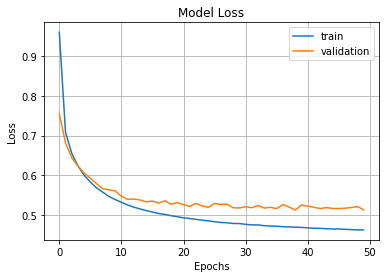

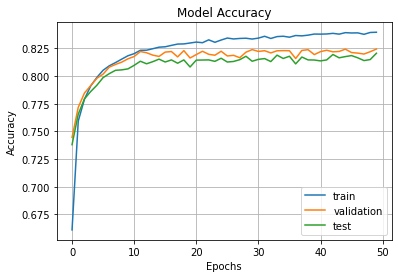

Final Test accuracy: 0.8205999732017517


In [ ]:
print('\none_hidden_layer_no_activation\n')
one_hidden_layer_no_activation(number_of_neurons)


two_hidden_layers_sigmoid



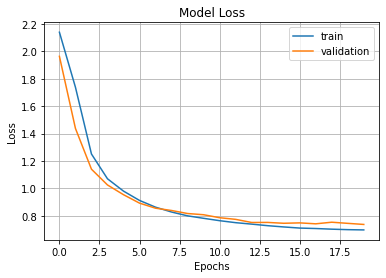

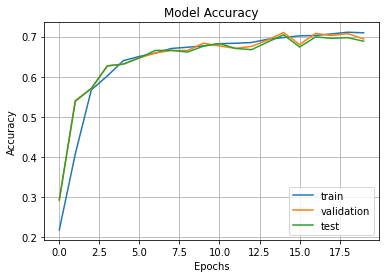

Final Test accuracy: 0.6883999705314636


In [ ]:
print('\ntwo_hidden_layers_sigmoid\n')
two_hidden_layers_sigmoid(number_of_neurons)


two_hidden_layers_relu

Model performed best with 0.01 learning rate:


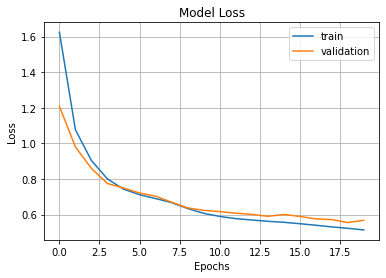

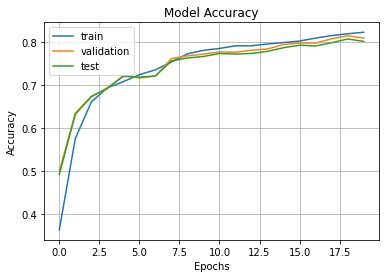

Final Test accuracy: 0.8073000025749207


In [ ]:
print('\ntwo_hidden_layers_relu\n')
two_hidden_layers_relu(number_of_neurons)


two_hidden_layers_relu_adam



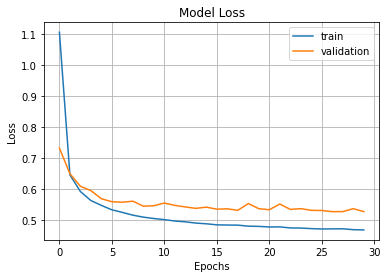

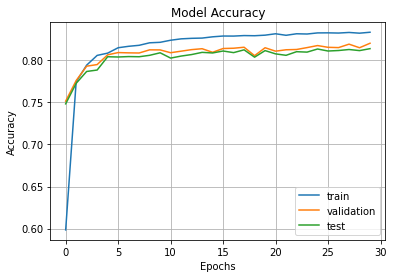

Final Test accuracy: 0.8138999938964844


In [ ]:
print('\ntwo_hidden_layers_relu_adam\n')
two_hidden_layers_relu_adam(number_of_neurons)


two_hidden_layers_relu_SGD_decreasing_lr



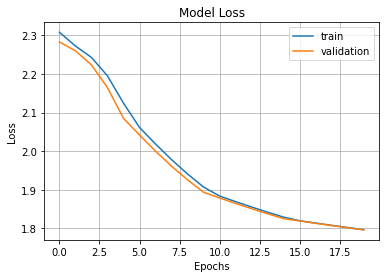

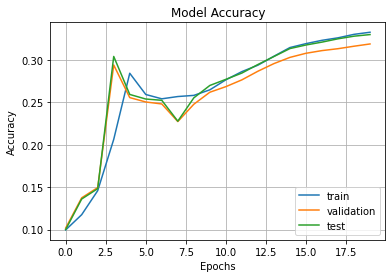

Final Test accuracy: 0.32989999651908875


In [ ]:
print('\ntwo_hidden_layers_relu_SGD_decreasing_lr\n')
two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)

### 32 neurons per layer

In [ ]:
# 32 neurons per layer
number_of_neurons = 32


one_hidden_layer_no_activation


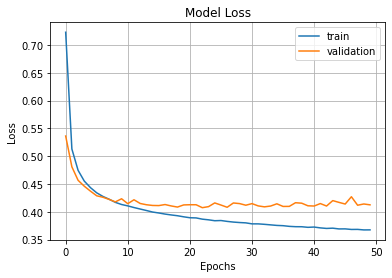

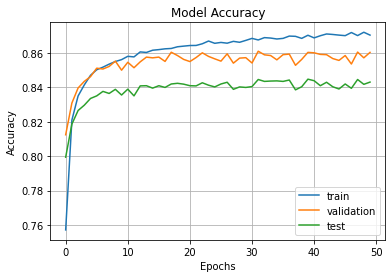

Final Test accuracy: 0.8429999947547913


In [ ]:
print('\none_hidden_layer_no_activation\n')
one_hidden_layer_no_activation(number_of_neurons)


two_hidden_layers_sigmoid



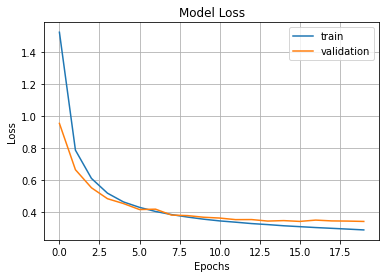

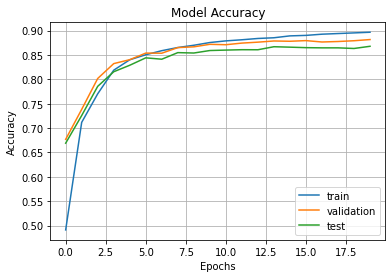

Final Test accuracy: 0.8676999807357788


In [ ]:
print('\ntwo_hidden_layers_sigmoid\n')
two_hidden_layers_sigmoid(number_of_neurons)


two_hidden_layers_relu

Model performed best with 0.1 learning rate:


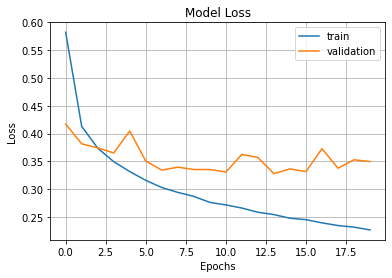

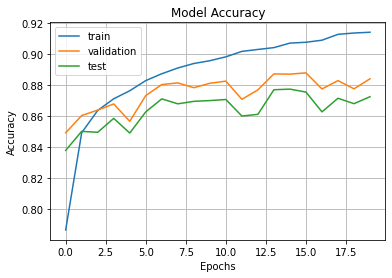

Final Test accuracy: 0.8717000250816345


In [ ]:
print('\ntwo_hidden_layers_relu\n')
two_hidden_layers_relu(number_of_neurons)


two_hidden_layers_relu_adam



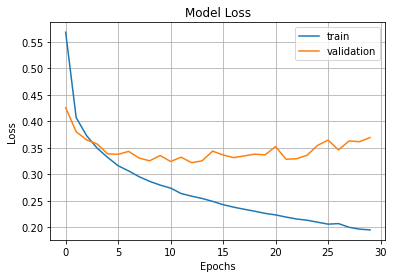

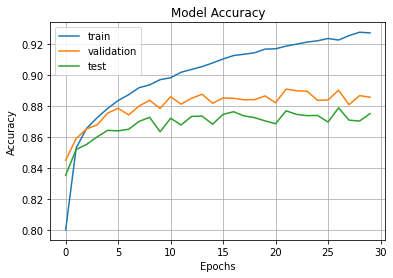

Final Test accuracy: 0.875


In [ ]:
print('\ntwo_hidden_layers_relu_adam\n')
two_hidden_layers_relu_adam(number_of_neurons)


two_hidden_layers_relu_SGD_decreasing_lr



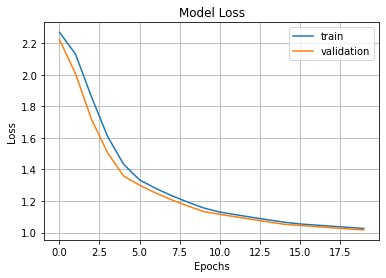

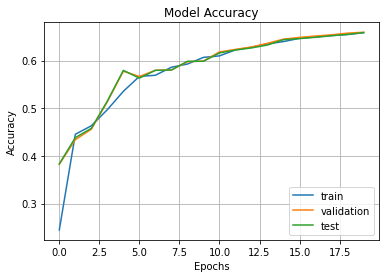

Final Test accuracy: 0.6586999893188477


In [ ]:
print('\ntwo_hidden_layers_relu_SGD_decreasing_lr\n')
two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)


four_hidden_layers_adam



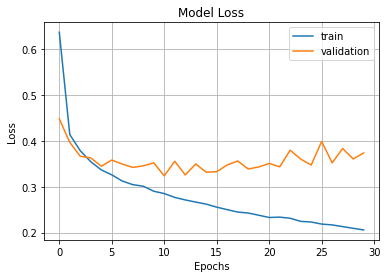

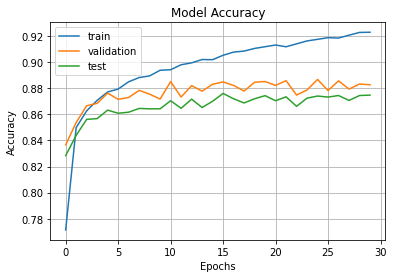

Final Test accuracy: 0.8748000264167786


In [ ]:
print('\nfour_hidden_layers_adam\n')
four_hidden_layers_adam(number_of_neurons)


four_hidden_layers_adam_weight_decay



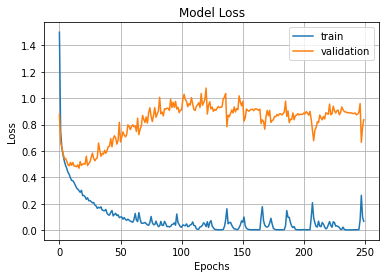

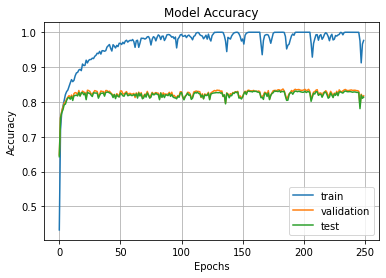

Final Test accuracy: 0.8137999773025513


In [ ]:
print('\nfour_hidden_layers_adam_weight_decay\n')
four_hidden_layers_adam_weight_decay(number_of_neurons)


four_hidden_layers_adam_early_stopping

triggers reset
Epoch 1
triggers reset
Epoch 2
triggers reset
Epoch 3
triggers reset
Epoch 4
triggers is 1
Epoch 5
triggers reset
Epoch 6
triggers is 1
Epoch 7
triggers is 2
Epoch 8
triggers reset
Epoch 9
triggers is 1
Epoch 10
triggers is 2
Epoch 11
triggers reset
Epoch 12
triggers is 1
Epoch 13
triggers is 2
Epoch 14
triggers is 3
Epoch 15
triggers is 4
Epoch 16
triggers is 5
Epoch 17
triggers is 6
Epoch 18
triggers is 7
Epoch 19
triggers is 8
Epoch 20
triggers is 9
Epoch 21
triggers is 10
Epoch 22
triggers is 11
Epoch 23
triggers is 12
Epoch 24
triggers is 13
Epoch 25
triggers is 14
Epoch 26
triggers is 15
Epoch 27
triggers is 16
Epoch 28
triggers is 17
Epoch 29
triggers is 18
Epoch 30
triggers is 19
Epoch 31
triggers is 20
model lost its patience!


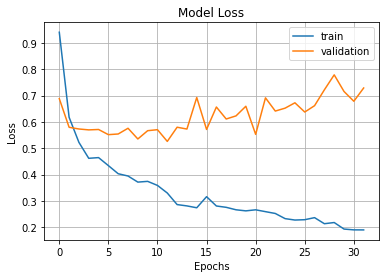

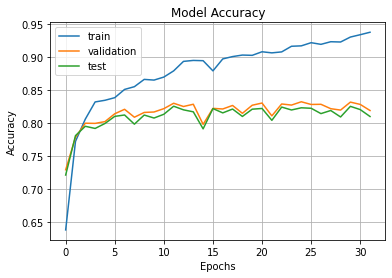

Final Test accuracy: 0.8100000023841858


In [ ]:
four_hidden_layers_adam_early_stopping(number_of_neurons)

### Questions
After implementing, running and getting the results Answer the following below:
1. The networks sorted according to their test results from the worst to the best.
2. Give intuitive explanation why we got such order after sorting.
3. Is there any difference between the test and the training accuracy? Why?
4. Don't forget to keep all the function plots in the notebook

### Question & Answers:


#### 1. The networks sorted according to their test results from the worst to the best.

##### Best networks for 4 neurons per layer

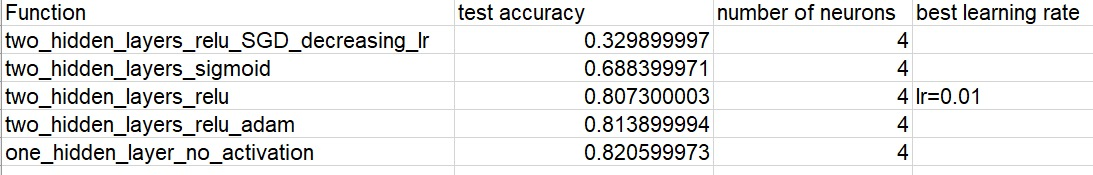

##### Best networks for 32 neurons per layer

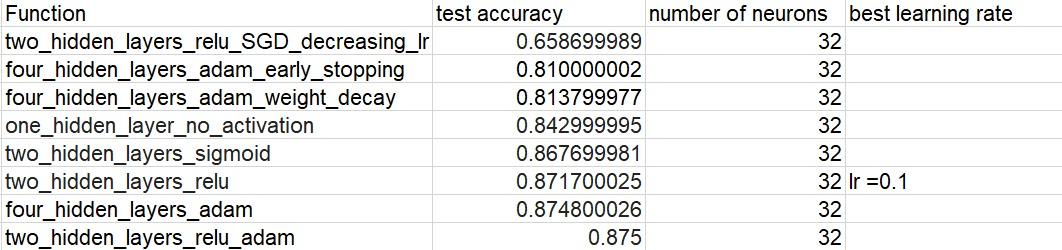

#### 2. Give intuitive explanation why we got such order after sorting.

In this section, we analyzed the performance of different types of neural networks on the same data. We investigated the effect of varying the hidden layer sizes, using different types of activation functions, implementing early stopping and weight decay, and decreasing the learning rate.
<br><br>
The best test accuracy we got was 0.875 from function two_hidden_layers_relu_adam and the second test accuracy of 0.8748 was from function four_hidden_layers_adam. The only difference between the functions is the number of hidden layers, where function four_hidden_layers_adam has 4 and two_hidden_layers_relu_adam has 2. We can conclude that the number of hidden layers in this case did not produce a substantial difference in results. In fact, adding layers more adds more computation but no advantage with accuracy.
<br>
We expected that adding more layers will have substantial impact on the model’s accuracy. But it wasn’t the case for this specific task.
<br><br>
Decreasing the learning rate during training can affect the performance of a neural network. We can observe it on function two_hidden_layers_relu_SGD_decreasing_lr which holds the lowest test accuracy 0.3298 and 0.6587 (for 4 neurons and 32 respectively). A very low learning rate can also make the training process slow and can prevent the network from learning some of the finer details in the data.
<br><br>
Despite not having an activation function, function one_hidden_layer_no_activation has a test accuracy of 0.8206 and 0.843 (for 4 neurons and 32 respectively) we can explain the good accuracy by the number of epochs (50) which helped the model to reach a plateau in accuracy.
<br><br>
Functions four_hidden_layers_adam_early_stopping and four_hidden_layers_adam_weight_decay have the same activation function (relu), hidden layers size, and they both trained on only 10% of the train set. Function four_hidden_layers_adam_early_stopping  has 0.81 test accuracy while function four_hidden_layers_adam_weight_decay  has 0.814 test accuracy. 
Function four_hidden_layers_adam_early_stopping had early stopping and function four_hidden_layers_adam_weight_decay had weight decay, that could be the cause for the different accuracies. Early stopping prevents overfitting by stopping the training before the network starts to over-learn the data, but can also stop the model too soon. In our case weight decay performed better on the test set, by a small margin - Both techniques are used for regularisation  to help prevent overfitting.
In our case they differ on the amount of epoch early stopping caused our model to stop at epoch 31, while weight decay allowed the model to run for 250 epochs. This can explain the reason of the difference in the test accuracy.


#### 3. Is there any difference between the test and the training accuracy? Why?

Predictably, we observed better accuracy in the training set vs the test set. This happens because the models were trained on the training data, so with each iteration improved their train accuracy, regardless of whether they were really improving at the tasks or merely overfitting.
